In [33]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

red_wine_data = pd.read_csv('red_wine.csv')
red_wine_data.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [34]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the red wine data
df = pd.read_csv('red_wine.csv')

# Generate the profile report
profile = ProfileReport(df, title='Profiling Report of Red Wine Data')

# Save the report as an HTML file
profile.to_file('red_wine_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

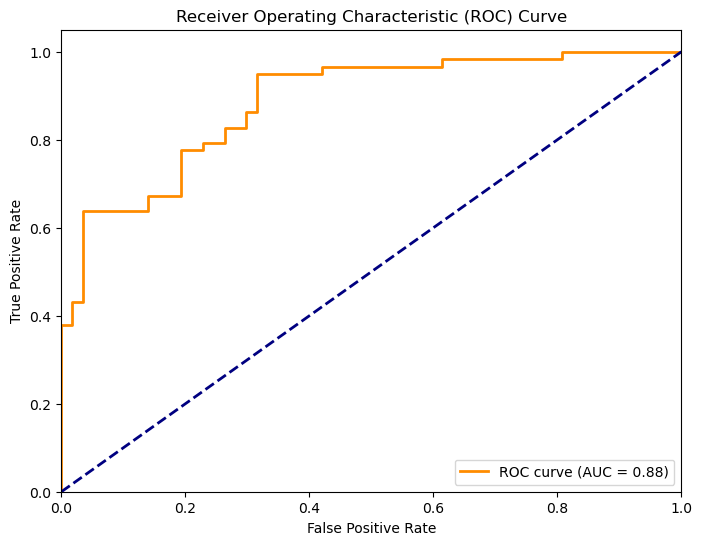

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("red_wine.csv")

# Assuming the last column is the target variable (class labels) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert the non-binary target variable into binary format
y_binary = (y == 'high').astype(int)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a classifier (e.g., logistic regression)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the figure within the Jupyter Notebook
%matplotlib inline

plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("red_wine.csv")

# Assuming the last column is the target variable (class labels) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each classifier
results = []

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)

    results.append((name, auc, accuracy))

# Print the results
print("Classifier\tAUC\tAccuracy")
for name, auc, accuracy in results:
    print(f"{name}\t{auc:.2f}\t{accuracy:.2f}")

Classifier	AUC	Accuracy
Baseline	0.50	0.50
Logistic Regression	0.88	0.77
Naive Bayes	0.89	0.81
Decision Tree	0.81	0.81
SVM-Linear	0.88	0.77
SVM-RBF	0.87	0.50
Random Forest	0.90	0.85


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the dataset
data = pd.read_csv("white_wine.csv")

# Assuming the last column is the target variable (class labels) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 0.85
